Name : Miss. Nikita Balasaheb Ghorpade.

Project : Bank Personal loan Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"D:\3RI\data_science_3ri\Datasets\Bank_Personal_Loan_Modelling.csv")

In [4]:
data.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Dataset Details

This case is about bank (Thera Bank)

Experience - No. of years of Professional Experience

Income - Annual Income of the customer in $

ZIP code -Home address ZIP code ( Zone Improvement Plan)

Family- No. of members in family


CCAvg - Average spending on credit cards per month ($)

Education - Education Level

            1:Undergraduate
            
            2:Graduate
            
            3:Advanced / Professional

Mortage - Value of house Mortgage if any ($)


Personal Loan - Did this customer accept the personal loan offered in the last campaign?


Security Account - Does the customer have a security account with the bank?


CD Account - Does the customer have certificate of deposit(CD) account with the bank


online - Does the customer use internet banking facilities?


Credit Card -Does the customer use credit card issued by this bank?

Predict whether a customer will respond to a Personal Loan Campaign!

In [5]:
data.shape

(5000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

##### Here we can see that there is no null values in the dataset.

## <font color='purple'> Exploratory Analysis

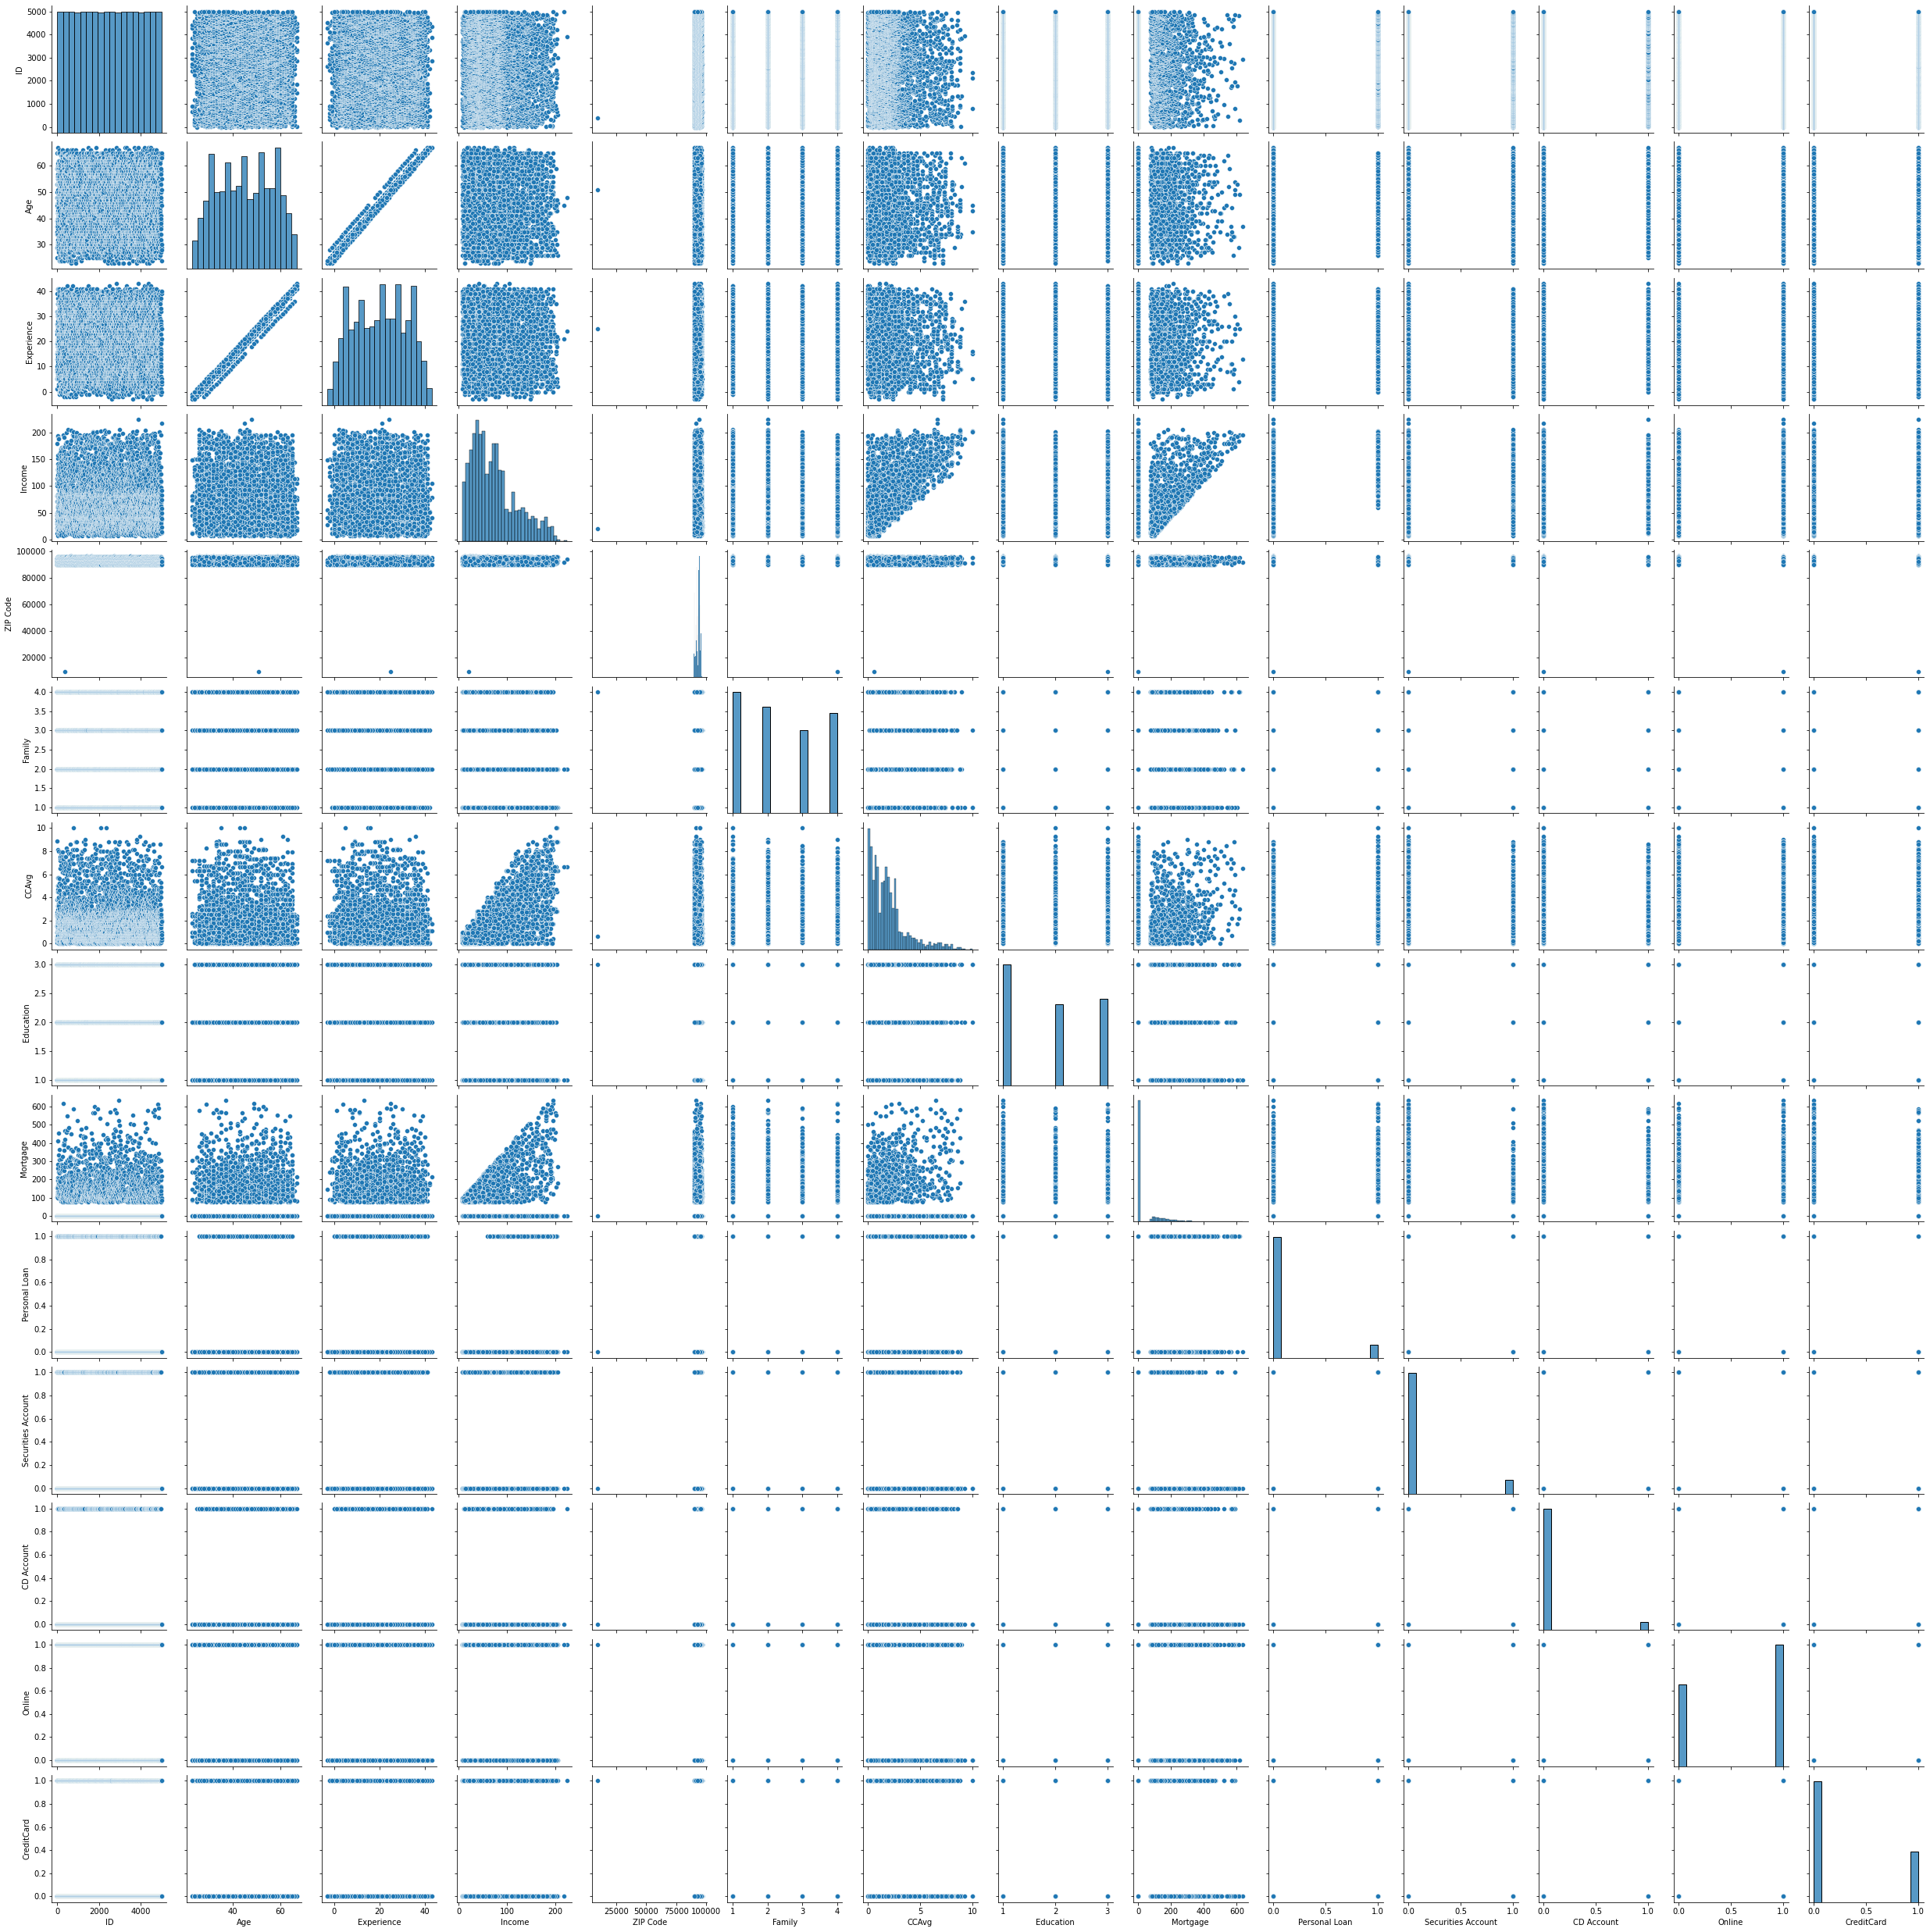

In [8]:
sns.pairplot(data)

Text(0.5, 1.0, 'Barplot between income of accepted and unaccepted personal loan')

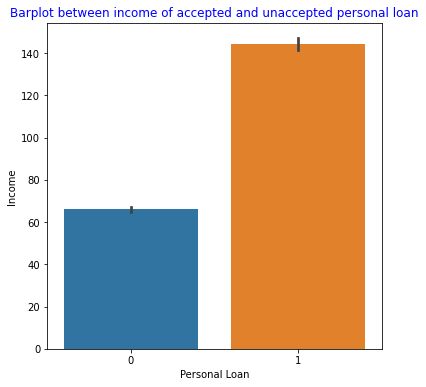

In [108]:
plt.figure(figsize=(6,6))
sns.barplot(data['Personal Loan'],data['Income'])
plt.title("Barplot between income of accepted and unaccepted personal loan",color='blue')

Here we can say that the persons was accepted personal loan has income is more than the unaccepted personal loan.

In [10]:
family=data['Family'].value_counts()
print(family)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


In [11]:
family_size=['1_memb','2_memb','4_memb','3_memb']
fa_df={'fa_size':family_size,'family':family}
print(fa_df)


{'fa_size': ['1_memb', '2_memb', '4_memb', '3_memb'], 'family': 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64}


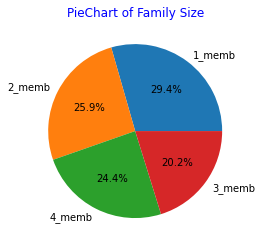

In [109]:
plt.pie(family,labels=family_size,autopct='%0.1f%%')
plt.title("PieChart of Family Size",color='b')
plt.show()

Here we see that in our data there more data of single member family and less data of 3 member family

In [110]:
data.columns

Index(['Personal Loan', 'ID', 'Age', 'Experience', 'Income', 'ZIP Code',
       'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

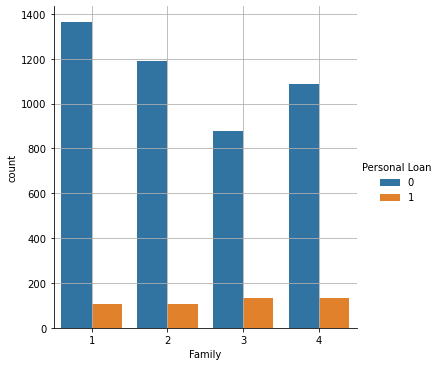

In [140]:
sns.catplot(x='Family',kind='count',hue='Personal Loan',data=data)
plt.grid()

Here we see that There is more quantity of unaccepted personal loan customers but if we go through the accepted personal loan then we can see that 3 member family and 4 member family customers has accepetd thier personal loan as compare to single member and 2 member family. But still there is little bit difference between this.

0    4520
1     480
Name: Personal Loan, dtype: int64


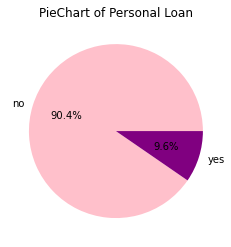

In [13]:
respondLcount=data['Personal Loan'].value_counts()
print(respondLcount)
respondLoan=['no','yes']
plt.pie(respondLcount,labels=respondLoan,autopct='%0.1f%%',colors=['pink','purple'])
plt.title("PieChart of Personal Loan")
plt.show()

There are 90.4% customers has'nt accept their Peraonal loan.

# <font color='purple'> Detection Of Outliers

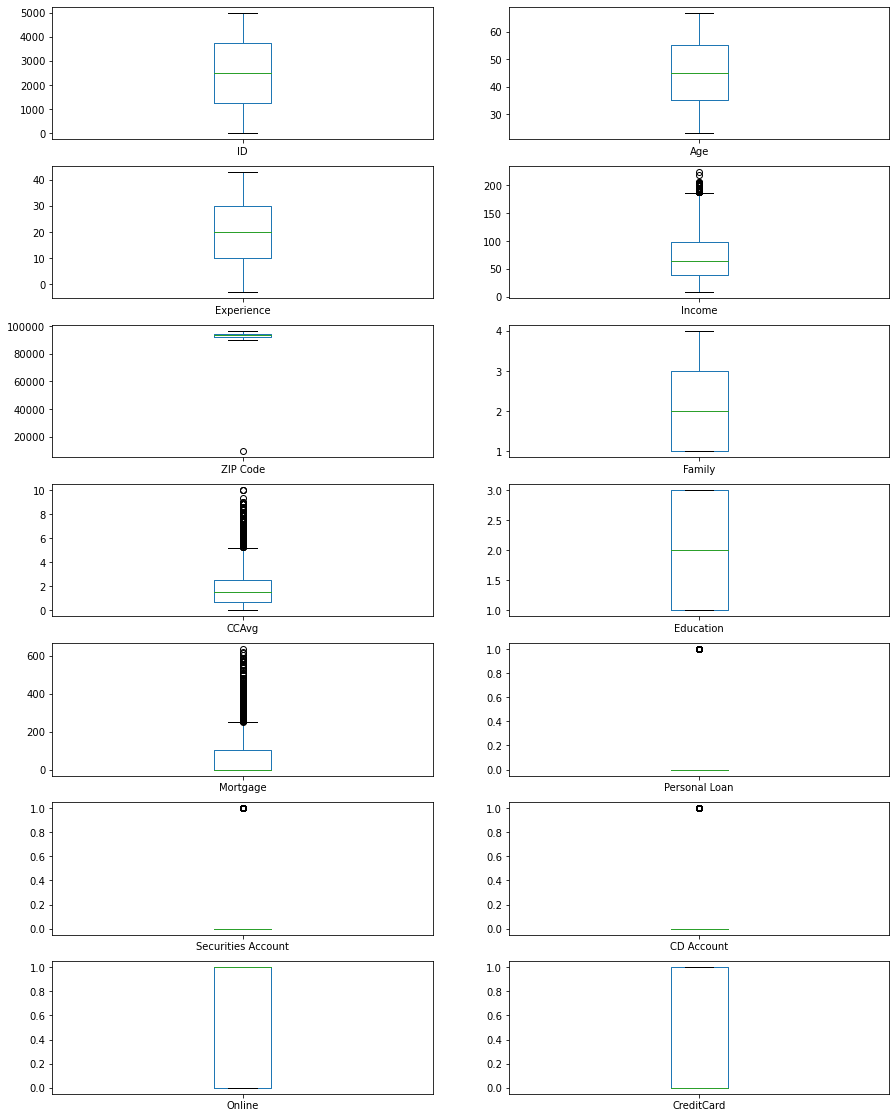

In [14]:
data.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))
plt.show()

# <font color='purple'>Handling of Outliers

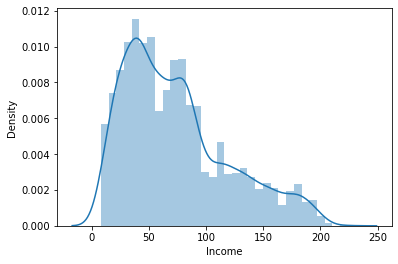

In [15]:
sns.distplot(data['Income'])
plt.show()

<AxesSubplot:>

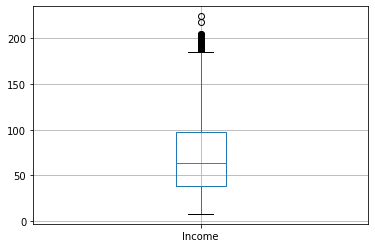

In [16]:
data.boxplot(column='Income')

###### The Income data is right skewed so we use IQR for determine the upper and lower boundary

In [17]:
#Inter Quartile Range
IQR_i=data['Income'].quantile(0.75)-data['Income'].quantile(0.25)
IQR_i

59.0

In [18]:
##Calculating The Boundaries
lower_bound=data['Income'].quantile(0.25)-(1.5*IQR_i)
upper_bound=data['Income'].quantile(0.75)+(1.5*IQR_i)
print('lower_bound :' , lower_bound)
print('upper_bound :',upper_bound)

lower_bound : -49.5
upper_bound : 186.5


In [19]:
data['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

###### Here there is no vast difference between upper boundary and maximum value of income series hence we continue with calculated boundaries.

In [20]:
data.loc[data['Income']>=186.5,'Income']=186.5

<AxesSubplot:xlabel='Income'>

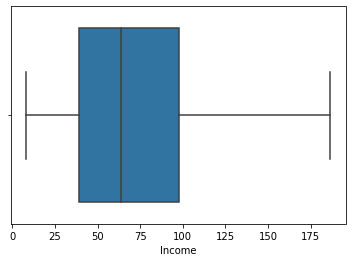

In [21]:
sns.boxplot(data['Income'])

<AxesSubplot:xlabel='CCAvg'>

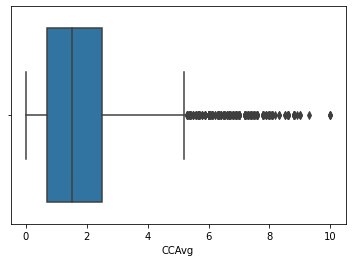

In [22]:
sns.boxplot(data['CCAvg'])

##### This series also not normally distributed it is right skewed


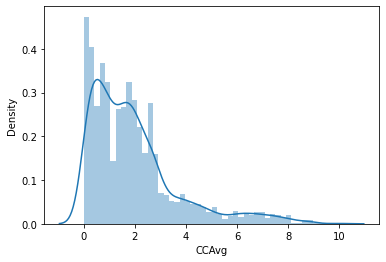

In [23]:
sns.distplot(data['CCAvg'])
plt.show()

In [24]:
# IQR
IQR_c=data['CCAvg'].quantile(0.75)-data['CCAvg'].quantile(0.25)
print('IQR for CCAvg : ',IQR_c)

IQR for CCAvg :  1.8


In [25]:
# upper and lower boundary
lower_bound_c=data['CCAvg'].quantile(0.25)-(1.5*IQR_c)
upper_bound_c=data['CCAvg'].quantile(0.75)+(1.5*IQR_c)
print('lower bound for CCAvg : ',lower_bound_c)
print('Upper bound for CCAvg : ',upper_bound_c)

lower bound for CCAvg :  -2.0
Upper bound for CCAvg :  5.2


In [26]:
data['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [27]:
#Extreme outlier boundary
#upper_bound_c=data['CCAvg'].quantile(0.75)+(3*IQR_c)
#print('upper boundary for extreme outlier : ',upper_bound_c)

In [28]:
data.loc[data['CCAvg']>=5.2,'CCAvg']=5.2

<AxesSubplot:xlabel='CCAvg'>

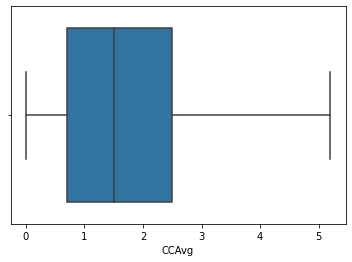

In [29]:
sns.boxplot(data['CCAvg'])

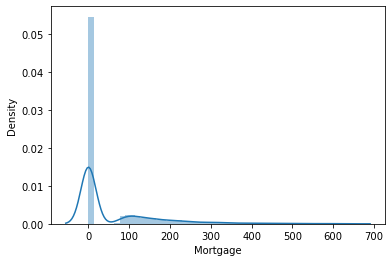

In [30]:
## distplot of Mortgage
sns.distplot(data['Mortgage'])
plt.show()

It is also right skewed, so same process is here as above

In [31]:
# IQR for Mortgage
IQR_m=data['Mortgage'].quantile(0.75)-data['Mortgage'].quantile(0.25)
print(IQR_m)

101.0


In [32]:
#Boundaries
lower_bound=data['Mortgage'].quantile(0.25)-(1.5*IQR_m)
upper_bound=data['Mortgage'].quantile(0.75)+(1.5*IQR_m)
print("Lower_bound : ", lower_bound)
print("Upper_bound : ",upper_bound)

Lower_bound :  -151.5
Upper_bound :  252.5


In [33]:
data['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [34]:
data.loc[data['Mortgage']>=252.5,'Mortgage']=252.5

<AxesSubplot:xlabel='Mortgage'>

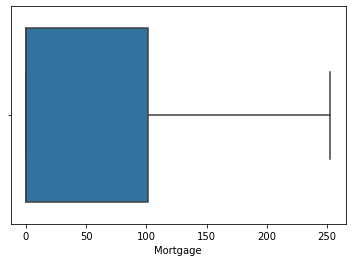

In [35]:
sns.boxplot(data['Mortgage'])

In [36]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

<AxesSubplot:xlabel='ZIP Code', ylabel='Density'>

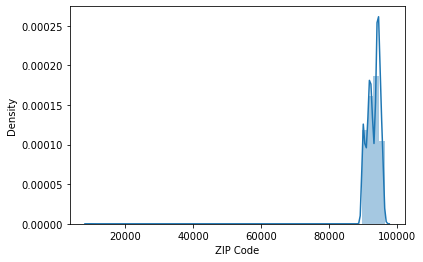

In [37]:
sns.distplot(data['ZIP Code'])

<AxesSubplot:xlabel='ZIP Code'>

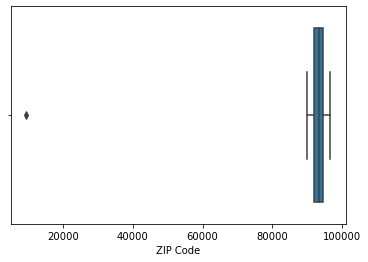

In [38]:
sns.boxplot(data['ZIP Code'])

In [39]:
# There is one outlier in ZIP Code column so we can remove it there is no much affected
IQR=data['ZIP Code'].quantile(0.75)-data['ZIP Code'].quantile(0.25)
print("IQR : ",IQR)

IQR :  2697.0


In [40]:
lower_bound=data['ZIP Code'].quantile(0.25)-(IQR*1.5)
upper_bound=data['ZIP Code'].quantile(0.75)+(IQR*1.5)
print('upperBound : ',upper_bound)
print('lowerBound : ',lower_bound)

upperBound :  98653.5
lowerBound :  87865.5


In [41]:
data.loc[data['ZIP Code']<=lower_bound,'ZIP Code']=lower_bound

<AxesSubplot:xlabel='ZIP Code'>

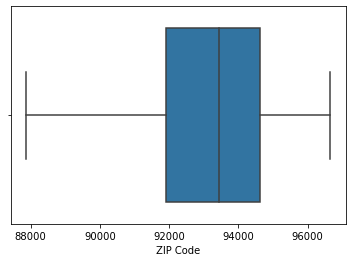

In [42]:
sns.boxplot(data['ZIP Code'])

<AxesSubplot:xlabel='ZIP Code', ylabel='Density'>

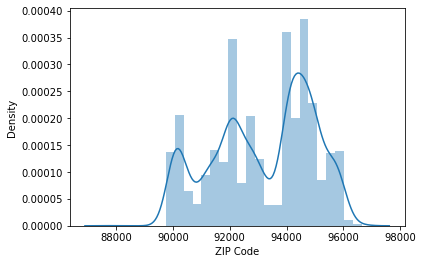

In [43]:
sns.distplot(data['ZIP Code'])

In [44]:
data.describe()

ID          Age   Experience       Income     ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.00000   
mean   2500.500000    45.338400    20.104600    73.617400  93168.21470   
std    1443.520003    11.463166    11.467954    45.626122   1761.05267   
min       1.000000    23.000000    -3.000000     8.000000  87865.50000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.00000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.00000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.00000   
max    5000.000000    67.000000    43.000000   186.500000  96651.00000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.831338     1.881000    50.494700       0.096000   
std       1.147663     1.452215     0.839869    83.005401       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000     5.200000     3.000000   252.500000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

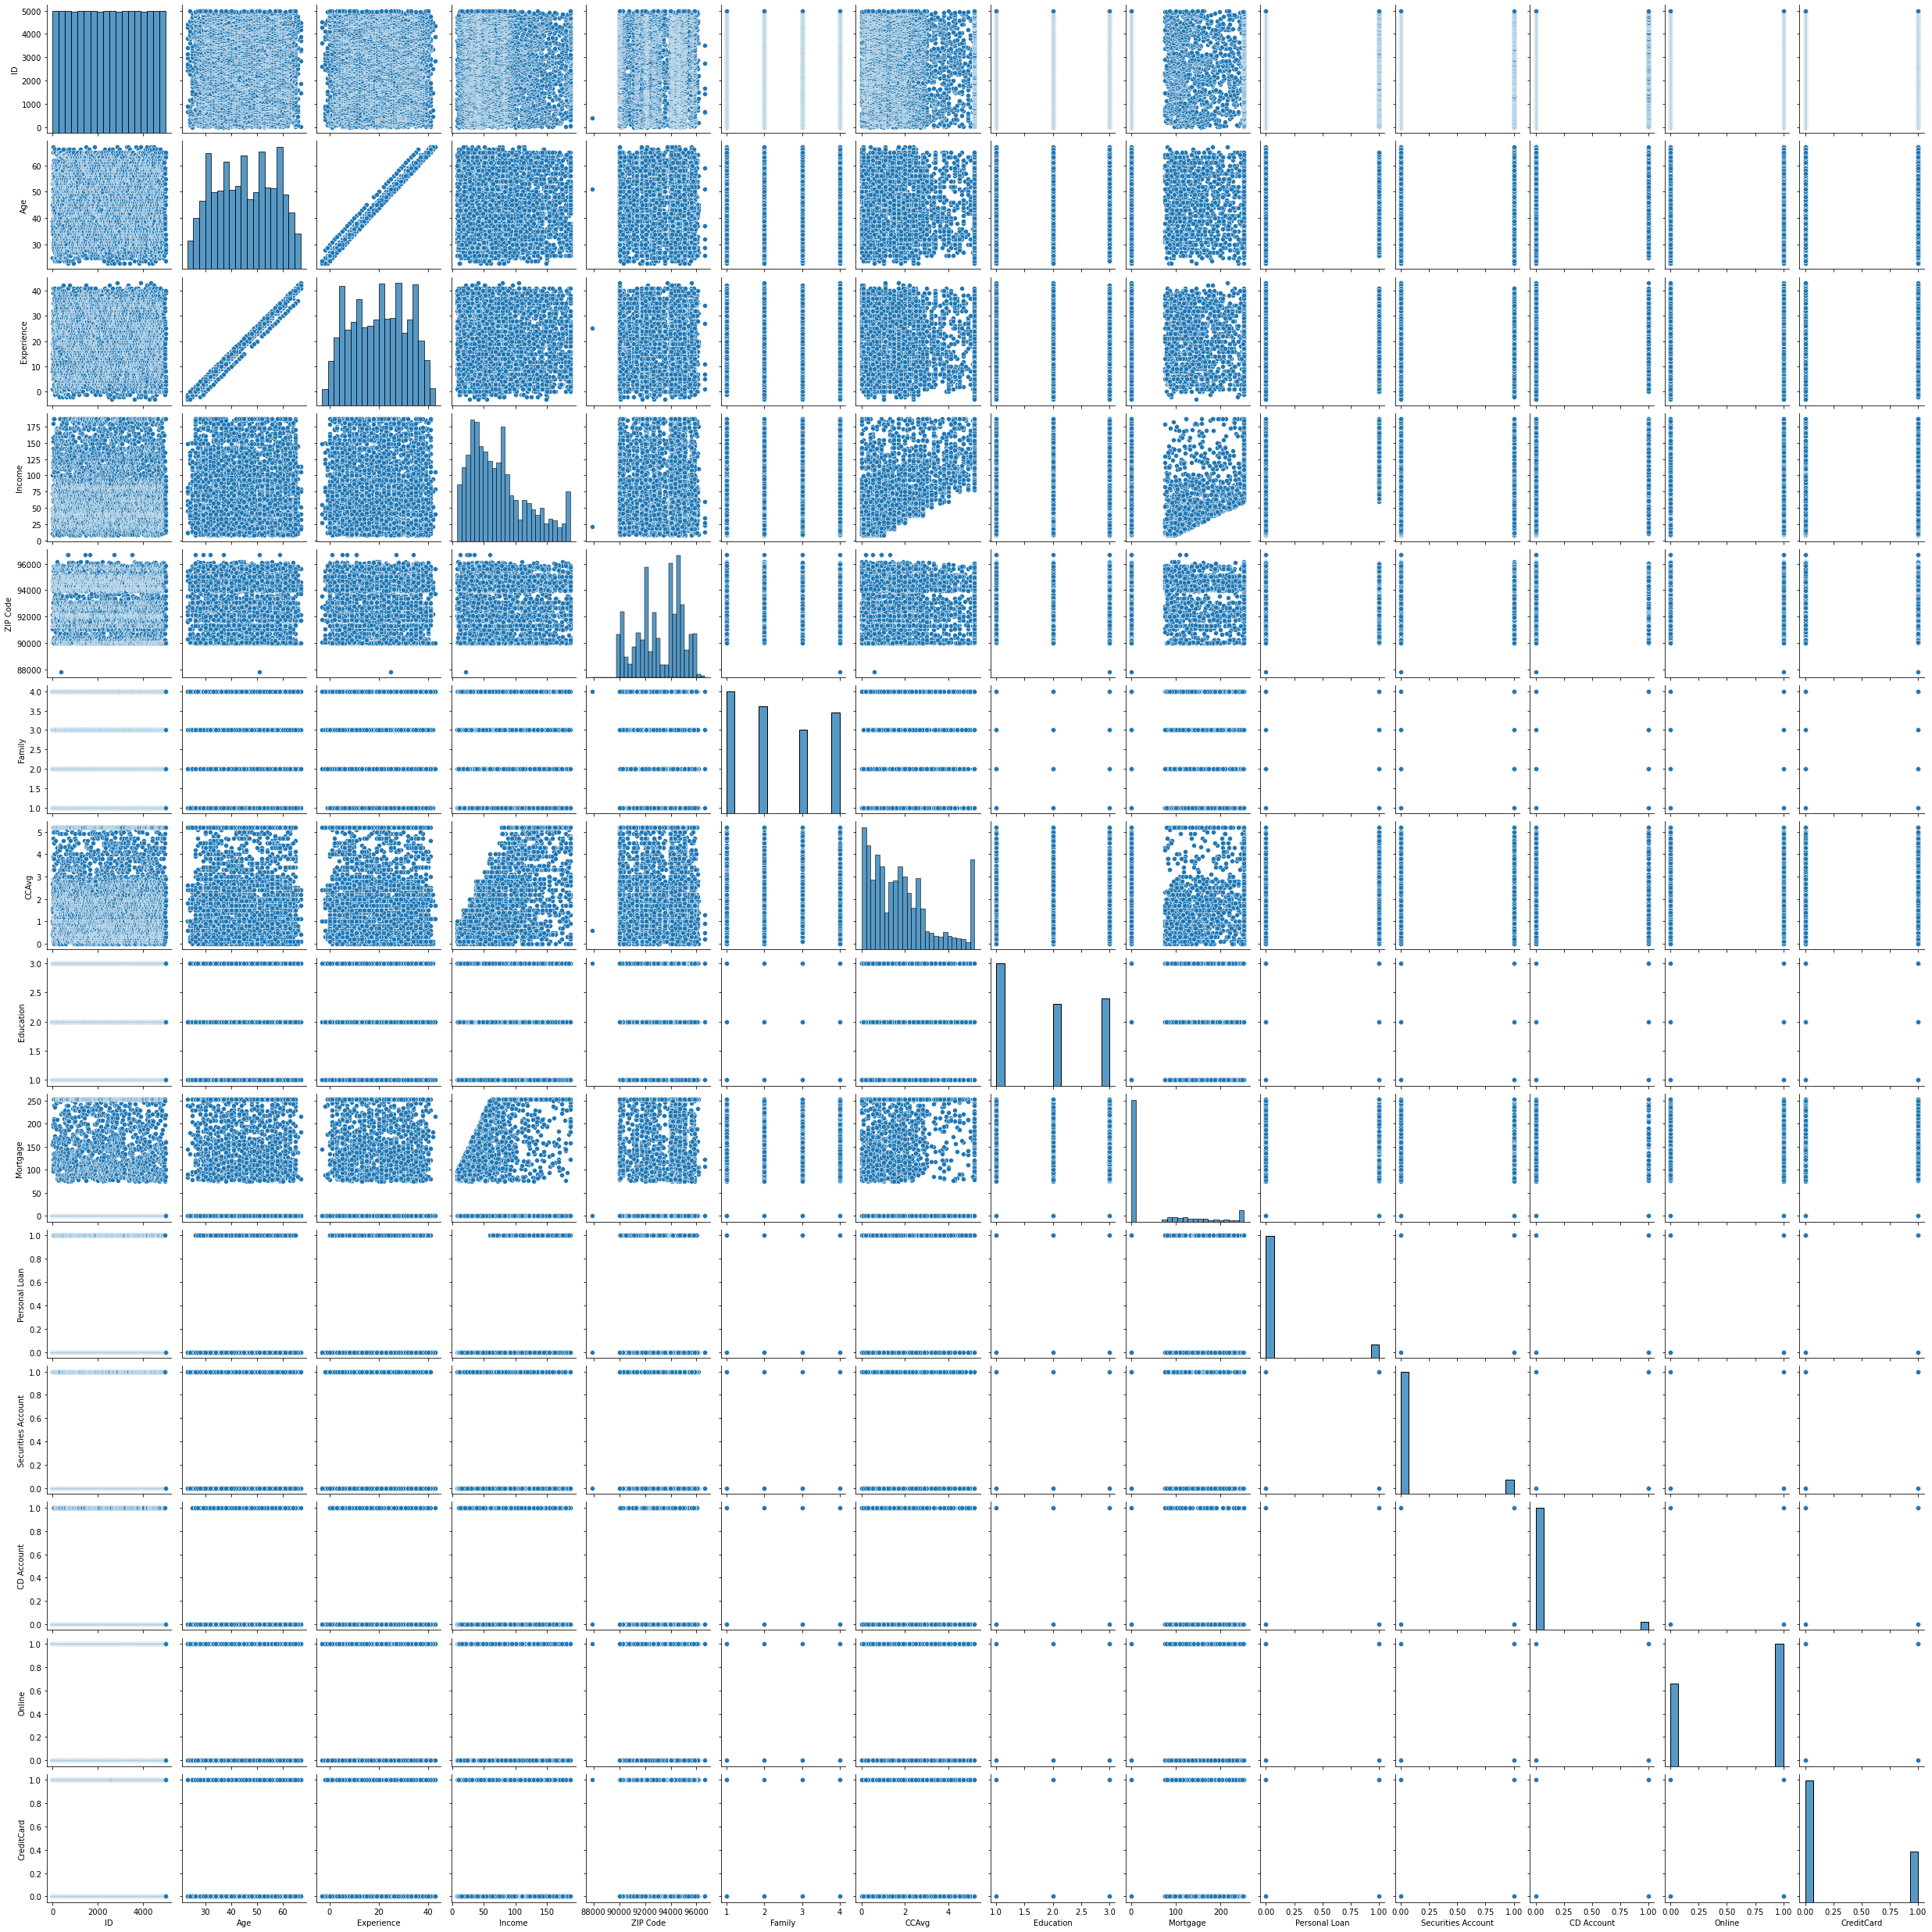

In [45]:
sns.pairplot(data)

# <font color='purple'>Feature Selection 

In [46]:
from sklearn.feature_selection import mutual_info_classif

In [47]:
data.head(2)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1    49.0   91107.0       4    1.6          1       0.0   
1   2   45          19    34.0   90089.0       3    1.5          1       0.0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0

In [48]:
first_col=data.pop('Personal Loan')
first_col

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [49]:
data.head(2)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1    49.0   91107.0       4    1.6          1       0.0   
1   2   45          19    34.0   90089.0       3    1.5          1       0.0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0

In [50]:
data.insert(0,"Personal Loan",first_col)

In [51]:
data.head(2)

Personal Loan  ID  Age  Experience  Income  ZIP Code  Family  CCAvg  \
0              0   1   25           1    49.0   91107.0       4    1.6   
1              0   2   45          19    34.0   90089.0       3    1.5   

   Education  Mortgage  Securities Account  CD Account  Online  CreditCard  
0          1       0.0                   1           0       0           0  
1          1       0.0                   1           0       0           0

In [52]:
x=data.drop('Personal Loan', axis=1)
y=data['Personal Loan']

In [53]:
imp_feat=mutual_info_classif(x,y)

In [54]:
imp_feat_=pd.Series(imp_feat,data.columns[1:len(data.columns)])

<AxesSubplot:>

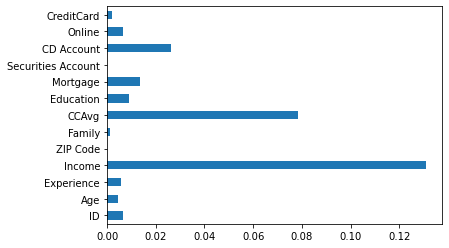

In [55]:
imp_feat_.plot(kind='barh')

 From the above plot we can say that Income and CCAvg is most important than others and then CD Account and Education.

In [56]:
X=data[['Income','CCAvg','Education','CD Account']]
Y=data['Personal Loan']

# <font color='purple'> Normality Test

In [57]:
from scipy import stats

In [58]:
stats.shapiro(X)

ShapiroResult(statistic=0.5643359422683716, pvalue=0.0)

 Here p-value is less than the 0.05 hence we reject the null hypothesis at 5% level of significance.Hence,Data is not Normal.

# <font color='purple'> Normalization

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scalar=StandardScaler()
X=scalar.fit_transform(X)

# <font color='purple'> Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3,random_state=12)


# <font color='purple'>Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [63]:
y_pred=log_reg.predict(X_test)

In [64]:
## Accuracy of Logistic regression algorithm on test Data
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
print('Accuracy of logistic regression classifier on test set:{:.2f}'.format(accuracy_score(Y_test,y_pred)))

Accuracy of logistic regression classifier on test set:0.94


In [65]:
log_reg.score(X_train,Y_train)


0.9511428571428572

In [66]:
## Accuracy of Logistic Regression algorithm on train data
print('Accuracy of logistic regression classifier on train test : ',log_reg.score(X_train,Y_train))

Accuracy of logistic regression classifier on train test :  0.9511428571428572


In [67]:
## Confusion Matrix
confusionMatrix=confusion_matrix(Y_test,y_pred)
print(confusionMatrix)

[[1333   26]
 [  59   82]]


Confusion matrix is a table that is used to define the Performance of classification algorithm.

Here  there are 26 predictions are actual respond is accepted but predicted as unaccepted and 59 are predicted as accepted but actually is unaccepted.

In [68]:
##ROC-AUC curve
from sklearn.metrics import roc_auc_score,auc,roc_curve


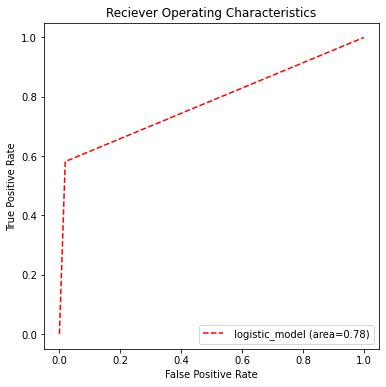

In [69]:
fpr, tpr, threshold = roc_curve(Y_test,y_pred)
log_auc=auc(fpr,tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='red',linestyle='--',label=" logistic_model (area=%0.2f)"%log_auc) 
# %0.2f tells python to put as many digits to the left of the decimal as you like but only 2 digits  to the right
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristics")
plt.legend(loc="lower right")
plt.savefig("log_ROC")

plt.show()

Larger the area under the curve better our moedel.

here AUC is 0.78 hence it is accepted discrimination that means the performance of logistic regression model is good. 

In [156]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1359
           1       0.76      0.58      0.66       141

    accuracy                           0.94      1500
   macro avg       0.86      0.78      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [176]:
log_reg_accuracy=accuracy_score(Y_test,y_pred)
print(round(log_reg_accuracy,2))

0.94


# <font color='purple'> K-nearest Neighbour

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_model=knn.fit(X_train,Y_train)
y_train_pred_knn=knn_model.predict(X_train)
y_pred_knn=knn_model.predict(X_test)

In [72]:
print("Accuracy of KNN model on test data for k=3 :%0.2f "%accuracy_score(Y_test,y_pred_knn))

Accuracy of KNN model on test data for k=3 :0.96 


In [73]:
knn=KNeighborsClassifier(n_neighbors=7,weights='distance')
knn_model=knn.fit(X_train,Y_train)
y_train_pred_knn=knn_model.predict(X_train)
y_pred_knn7=knn_model.predict(X_test)

In [161]:
KNN_accuracy=round(accuracy_score(Y_test,y_pred_knn7),2)
print("Accuracy of KNN model on test data for k=7 :%0.2f "%accuracy_score(Y_test,y_pred_knn7))

Accuracy of KNN model on test data for k=7 :0.96 


Here we use different k values but there is no change in accuracy score hence we can use any of them.

In [75]:
confusionMatrix=confusion_matrix(Y_test,y_pred_knn7)
print(confusionMatrix)

[[1345   14]
 [  39  102]]


Here 14 predictions are actually accepted responce but predicted as unaccepted.

And 39 predictions are actually responded as no but predicted as responde as yes.

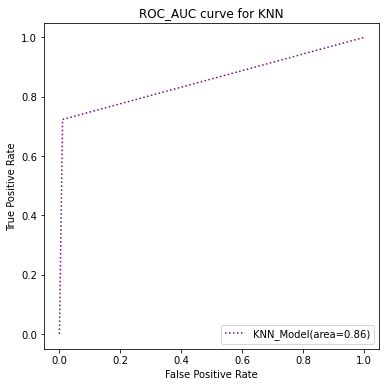

In [76]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred_knn7)
knn_auc=auc(fpr,tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color="purple",linestyle=':',label="KNN_Model(area=%0.2f)"%knn_auc)
plt.title("ROC_AUC curve for KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn7))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1359
           1       0.88      0.72      0.79       141

    accuracy                           0.96      1500
   macro avg       0.93      0.86      0.89      1500
weighted avg       0.96      0.96      0.96      1500



In [78]:
knn.score(X_test,Y_test)

0.9646666666666667

Here accuracy of KNN model is 96% and AUC of KNN is 0.86 , it is Excellent Discrimination.

# <font color='purple'> Support Vector Machine

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [80]:
svm_=SVC(gamma=0.025,C=3)
# there is no rule for taking value of gamma and complexity,
# gamma is the measure of influence
#gamma value is standard value and c is the level of complexity scaled on 1 to 5 we can change this value
svm_model=svm_.fit(X_train,Y_train)
y_pred_svm=svm_model.predict(X_test)

In [163]:
svm_accuracy=round(svm_.score(X_test,Y_test),2)
print(svm_accuracy)

0.96


In [164]:
round(accuracy_score(Y_test,y_pred_svm),2)

0.96

In [165]:
confusion_matrix_svm=confusion_matrix(Y_test,y_pred_svm)
print(confusion_matrix_svm)

[[1349   10]
 [  54   87]]


here 10 actually responded for personal loan as yes but predicted as No respond.

and 54 actually unaccpted personal loan but predicted as accepted personal loan.

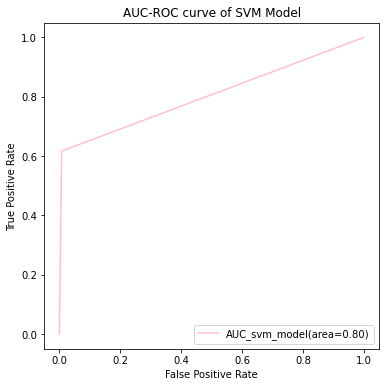

In [85]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred_svm)
auc_svm=auc(fpr,tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,linestyle='-',color='pink',label='AUC_svm_model(area=%0.2f)'%auc_svm)
plt.title("AUC-ROC curve of SVM Model")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [86]:
print("Classification Report",classification_report(Y_test,y_pred_svm))

Classification Report               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1359
           1       0.90      0.62      0.73       141

    accuracy                           0.96      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.96      0.96      0.95      1500



The accuracy of Support Vector Machine 96%.

The AUC that means Area under Curve is 0.80 that means it is also Excellent Discrimination.

# <font color='purple'> Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
nb=GaussianNB()
nb_model=nb.fit(X_train,Y_train)
y_pred_nb=nb_model.predict(X_test)

In [146]:
print("Accuracy of naive Bayes model for test data is %0.02f%% ."%accuracy_score(Y_test,y_pred_nb))

Accuracy of naive Bayes model for test data is 0.89% .


In [166]:
nb_accuracy=np.round(nb_model.score(X_test,Y_test),2)
print(nb_accuracy)

0.89


In [147]:
print("Accuracy of Naive Bayes model for train data is %0.2f%% ."%nb_model.score(X_train,Y_train))

Accuracy of Naive Bayes model for train data is 0.90% .


In [92]:
print("Confusion Matrix")
confusionMatrix=confusion_matrix(Y_test,y_pred)
print(confusionMatrix)

Confusion Matrix
[[1333   26]
 [  59   82]]


Here 26 observations are actually accepted the personal loan but predict as unaccepted.

59 observation are predicted as accepted but it is actually unaccepted.

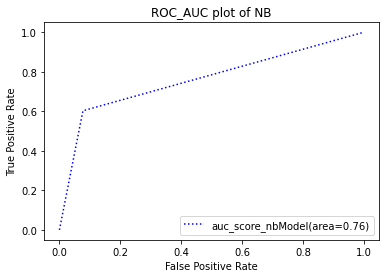

In [93]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred_nb)
auc_nb=auc(fpr,tpr)
plt.plot(fpr,tpr,linestyle=':',color='blue',label="auc_score_nbModel(area=%0.2f)"%auc_nb)
plt.title("ROC_AUC plot of NB")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

The Accuracy of Naive Bayes model is 89%.

The AUC of Naive Bayes model is 0.76 which is acceptable discrimination.

# <font color='Purple'>Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier


In [100]:
rf=RandomForestClassifier()
rf_model=rf.fit(X_train,Y_train)
y_pred_rf=rf_model.predict(X_test)

In [167]:
rf_accuracy=round(accuracy_score(Y_test,y_pred_rf),2)
print(rf_accuracy)
print("Accuracy of random forest for train data: %0.2f  "%rf_model.score(X_train,Y_train))
print("Accuracy of random forest for test data : %0.2f "%rf_model.score(X_test,Y_test))

0.96
Accuracy of random forest for train data: 0.99  
Accuracy of random forest for test data : 0.96 


In [102]:
print('CONFUSION MATRIX')
cm=confusion_matrix(Y_test,y_pred_rf)
print(cm)

CONFUSION MATRIX
[[1335   24]
 [  36  105]]


Here 24 observations predicted as unaccepted but actually it is accepted

36 observations are predicted as accepted and actually it is unaccepted

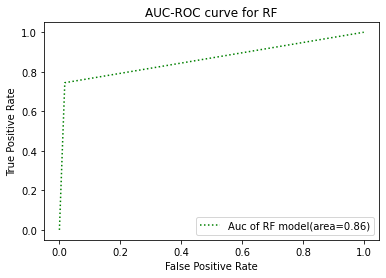

In [103]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred_rf)
auc_rf=auc(fpr,tpr)
plt.plot(fpr,tpr,linestyle=":",color='green',label="Auc of RF model(area=%0.2f)"%auc_rf)
plt.title("AUC-ROC curve for RF")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

The accuracy of Random Forest model is 96%.

The AUC score of random forest is 0.86 which is excellent Discrimination.

In [189]:
result=pd.DataFrame({"Classification Model":["Logistic Regression","K Nearest Neighbor","Support Vector Machine","Naive Bayes","Random Forest"],
                    "Accuracy":[round(log_reg_accuracy,2),KNN_accuracy,svm_accuracy,nb_accuracy,rf_accuracy]})

In [193]:
result

Classification Model  Accuracy
0     Logistic Regression      0.94
1      K Nearest Neighbor      0.96
2  Support Vector Machine      0.96
3             Naive Bayes      0.89
4           Random Forest      0.96

In [204]:
print("AUC of KNN %0.2f "%knn_auc)
print("AUC of SVM %0.2f"%auc_svm)
print("AUC of Random Forest %0.2f"%auc_rf)

AUC of KNN 0.86 
AUC of SVM 0.80
AUC of Random Forest 0.86


The accuracy of KNN, SVM, Random Forest is same and also good so we go to the AUC score the here also the auc score of KNN and Random Forest is same so We can use any of them for prediction.